<a href="https://colab.research.google.com/github/datrz/its.damian/blob/main/Handball_Match_Report_with_PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danish Handball Automatic Document Reader
The purpose of the project was to investigate a possibility of automatical reading of the Danish Handball League Match Reports in order to transfer them into a DataFrame at the later stage of the project.

The source file were to be found on the following websites:
- https://tophaandbold.dk/kampprogram/1-division-kvinder
- https://tophaandbold.dk/kampprogram/1-division-herrer



## Installation of packages
Connect to drive <br>
Install the PaddleOCR layout parser package <br>
Install version 2.0.1 of PaddleOCR

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%%capture
%cd /content/drive/MyDrive/ColabNotebooks/Handball/
!pwd

In [3]:
%%capture
!pip install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl

In [4]:
%%capture
!pip install paddlepaddle "paddleocr>=2.0.1"

Install converters from PDF to Image and Popplier, you might need to install it locally on your computer. On MAC via terminal: brew install poppler

In [6]:
%%capture
!pip install pdf2image
!pip install pytesseract
!apt-get install poppler-utils


## Import test image
Import PDF and convert it into image. Save it as JPG.

In [9]:
# import module
import pdf2image as p2
from pdf2image import convert_from_path

pages = convert_from_path('ex.pdf')

for i in range(len(pages)):
  pages[i].save('pg.jpg', 'JPEG')

#for page in pages:
#    page.save('out.jpg', 'JPEG')

Import all needed packages from PaddleOCR and OCR model. Then find the elements on the figure with PaddleOCR.

download https://paddle-model-ecology.bj.bcebos.com/model/layout-parser/ppyolov2_r50vd_dcn_365e_publaynet.tar to /root/.paddledet/inference_model/ppyolov2_r50vd_dcn_365e_publaynet/ppyolov2_r50vd_dcn_365e_publaynet_infer/ppyolov2_r50vd_dcn_365e_publaynet.tar


100%|██████████| 221M/221M [00:33<00:00, 6.69MiB/s]


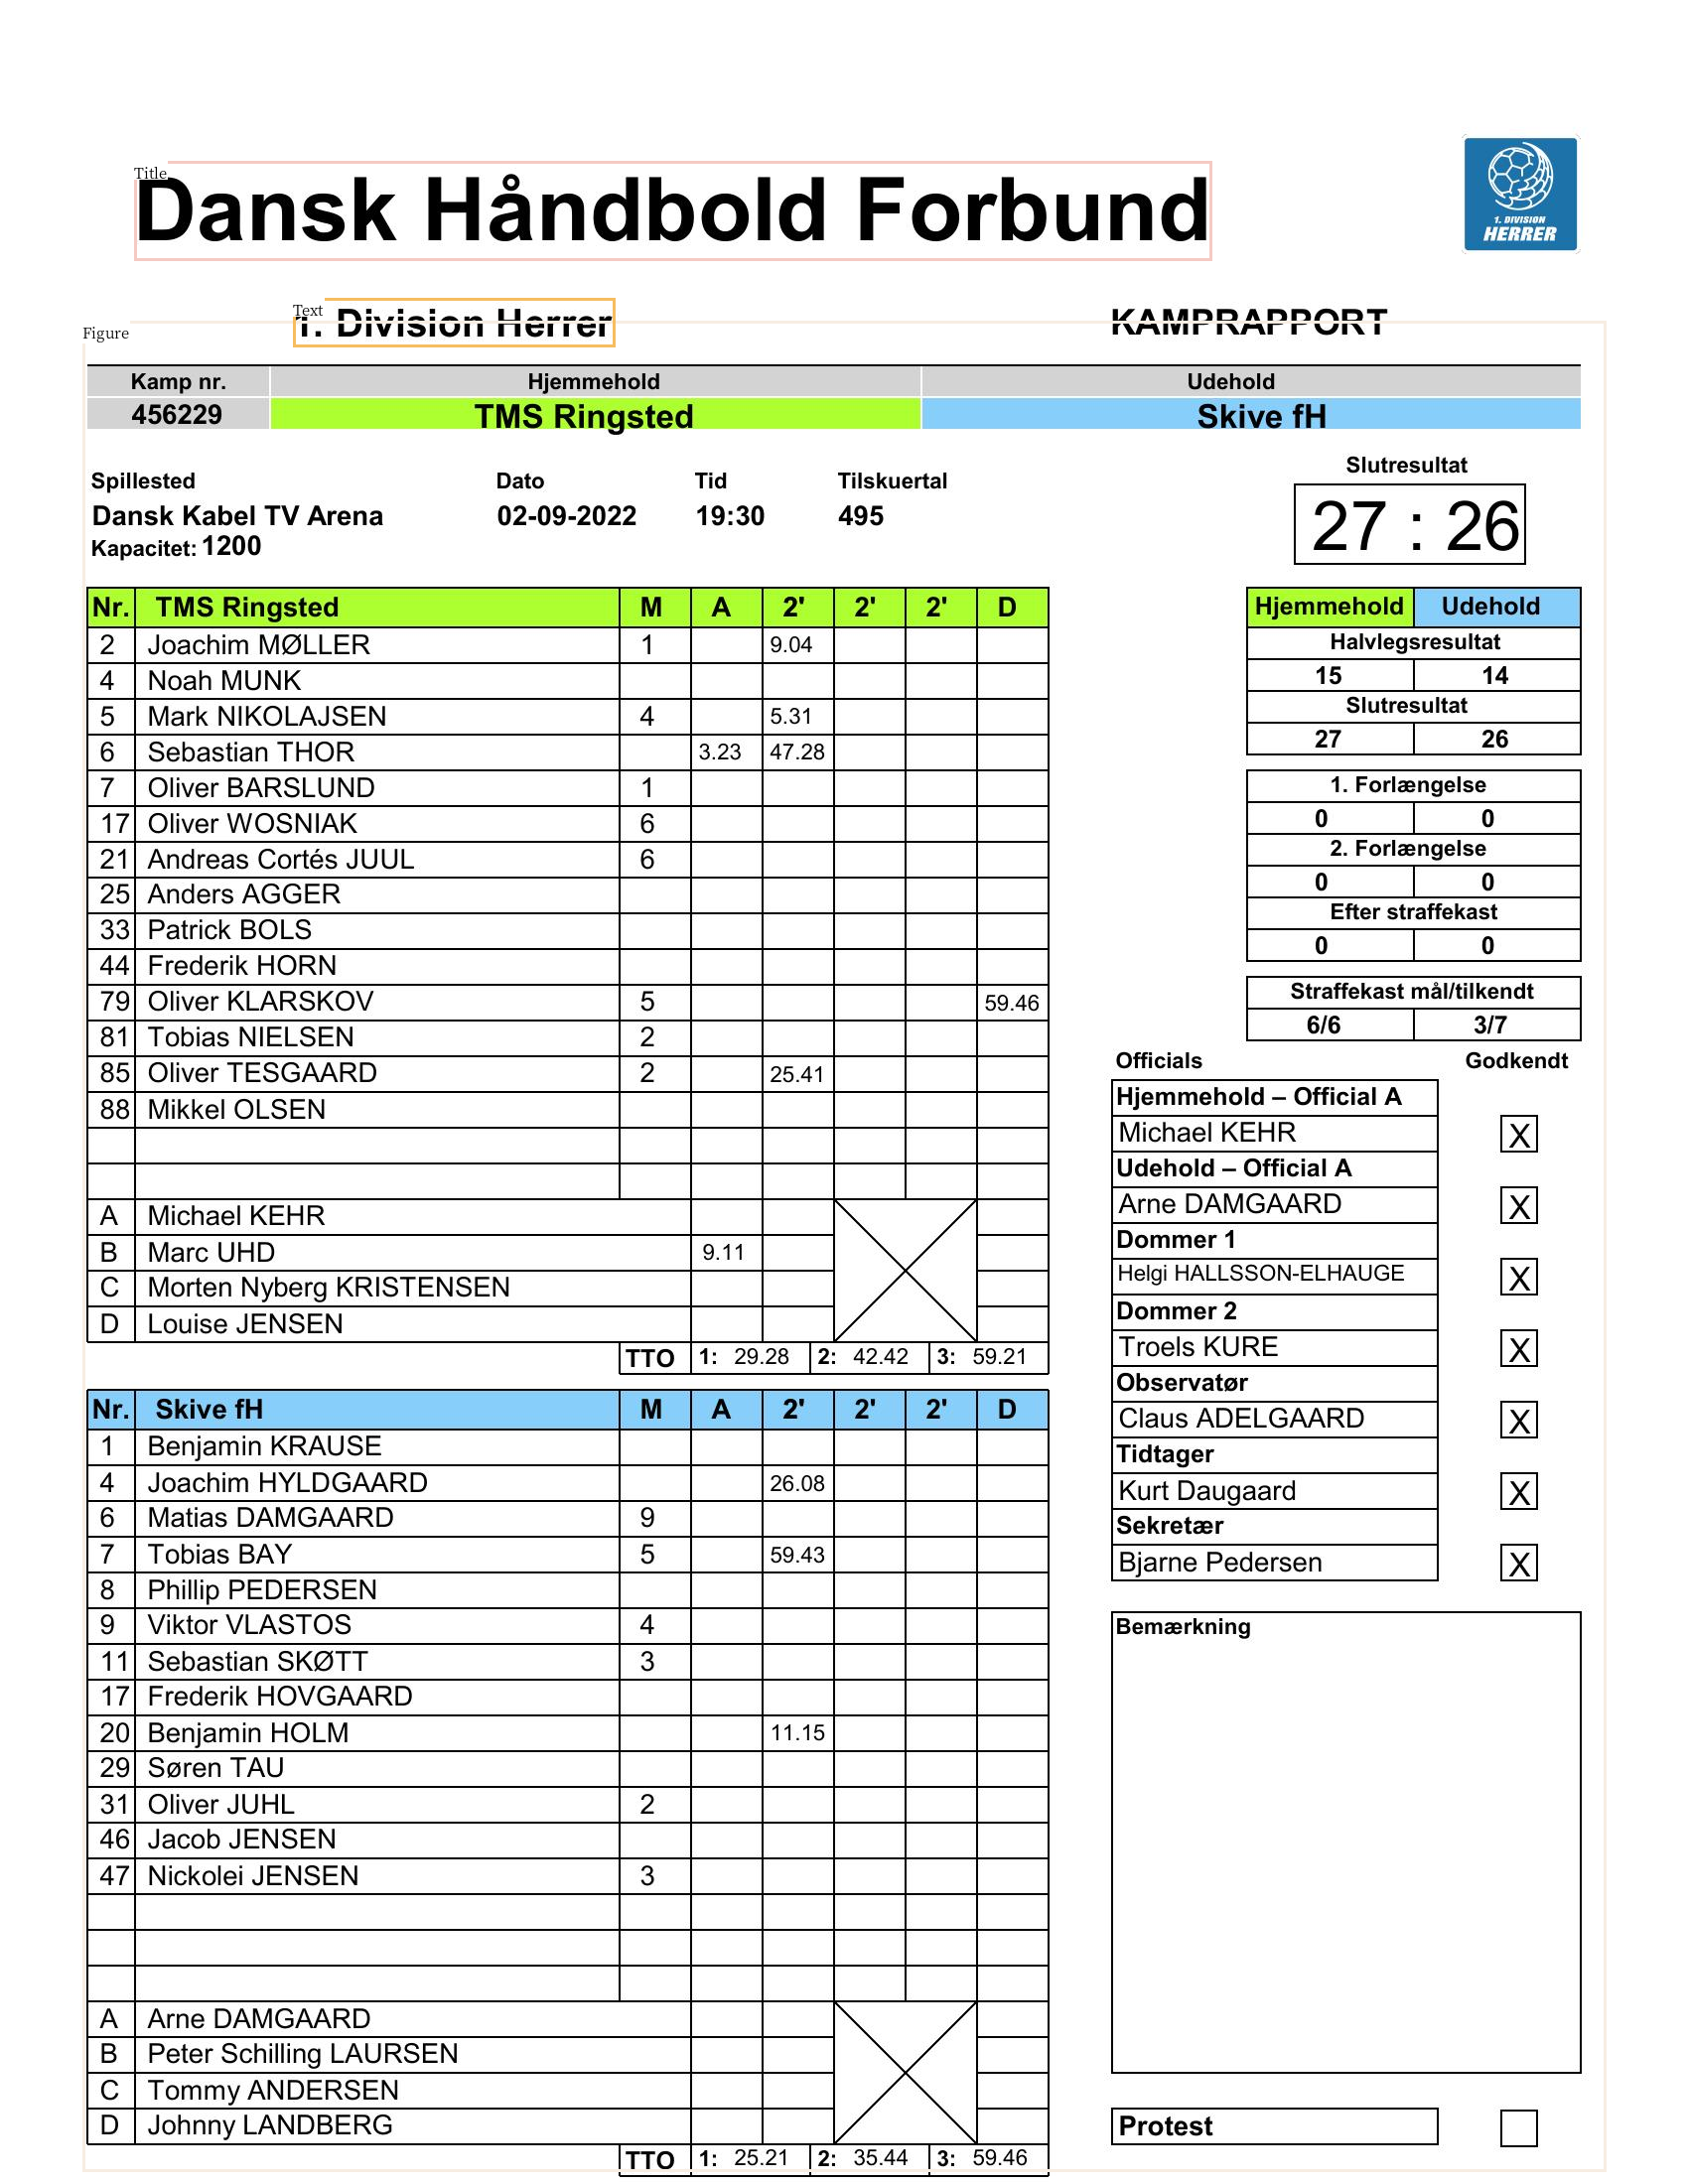

In [10]:
import cv2
import layoutparser as lp
import numpy as np
import math
import matplotlib.pyplot as plt
image = cv2.imread("p.jpg")

#changing format of the image to fit PaddleOCR format requirement
image = image[..., ::-1]

# load model ready to use model from the package, suited for table recognition
## Adding thereshold (min probability for recognizing something as things from label_map)
## Adding labels to elements to be recognized in Label_map
## False for enforcing using CPU
## Enabling certain model to be used for this task

model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)
# Detect - like predict attribute
layout = model.detect(image)

# show result
show_img = lp.draw_box(image, layout, box_width=3, show_element_type=True)
show_img

Finding tables/figures and saving their coordinates


In [11]:
for l in layout:
  if l.type in ['Table', 'Figure']:
    x_1 = int(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

In [12]:
# Extracting only the area marked with the rectangle
image = cv2.imread('p.jpg')
cv2.imwrite('p_extracted.jpg', image[y_1:y_2, x_1:x_2])

True

## OCR
Load remaining packages and find text on the image using OCR function.

In [13]:
from paddleocr import PaddleOCR, draw_ocr

In [14]:
%%capture
# OCR in this case also acts as predit
ocr = PaddleOCR(lang='en')
image_height = image.shape[0]
image_width = image.shape[1]
output = ocr.ocr('p.jpg')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:19<00:00, 202kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:11<00:00, 879kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 297kiB/s]

[2022/11/29 18:59:58] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

[2022/11/29 18:59:59] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/29 19:00:00] ppocr DEBUG: dt_boxes num : 154, elapse : 1.199704885482788
[2022/11/29 19:00:14] ppocr DEBUG: rec_res num  : 154, elapse : 14.130645751953125


Create 2 variables for coordinates of the outlines where text is found, together with content of those boxes

In [15]:
# Extracting output - coordinates for boxes with text and the content of them. Then probabilities that the text is that text
boxes = [line[0] for line in output[0]]
texts = [line[1][0] for line in output[0]]
probabilities = [line[1][1] for line in output[0]]

Creating an image with overlay of boxes and text on them


In [16]:
# Creating an image with overlay of boxes and text on them
image_with_boxes = image.copy()
for box, text in zip(boxes, texts):
  cv2.rectangle(image_with_boxes,
                (int(box[0][0]), int(box[0][1])), (int(box[2][0]), int(box[2][1])),
                (0,0,255), 1
  )
  cv2.putText(image_with_boxes, text, (int(box[1][0]), int(box[0][1])),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (222,0,0), 1)
cv2.imwrite('p_with_boxes.jpg', image_with_boxes)

True

Print each text and position of each box


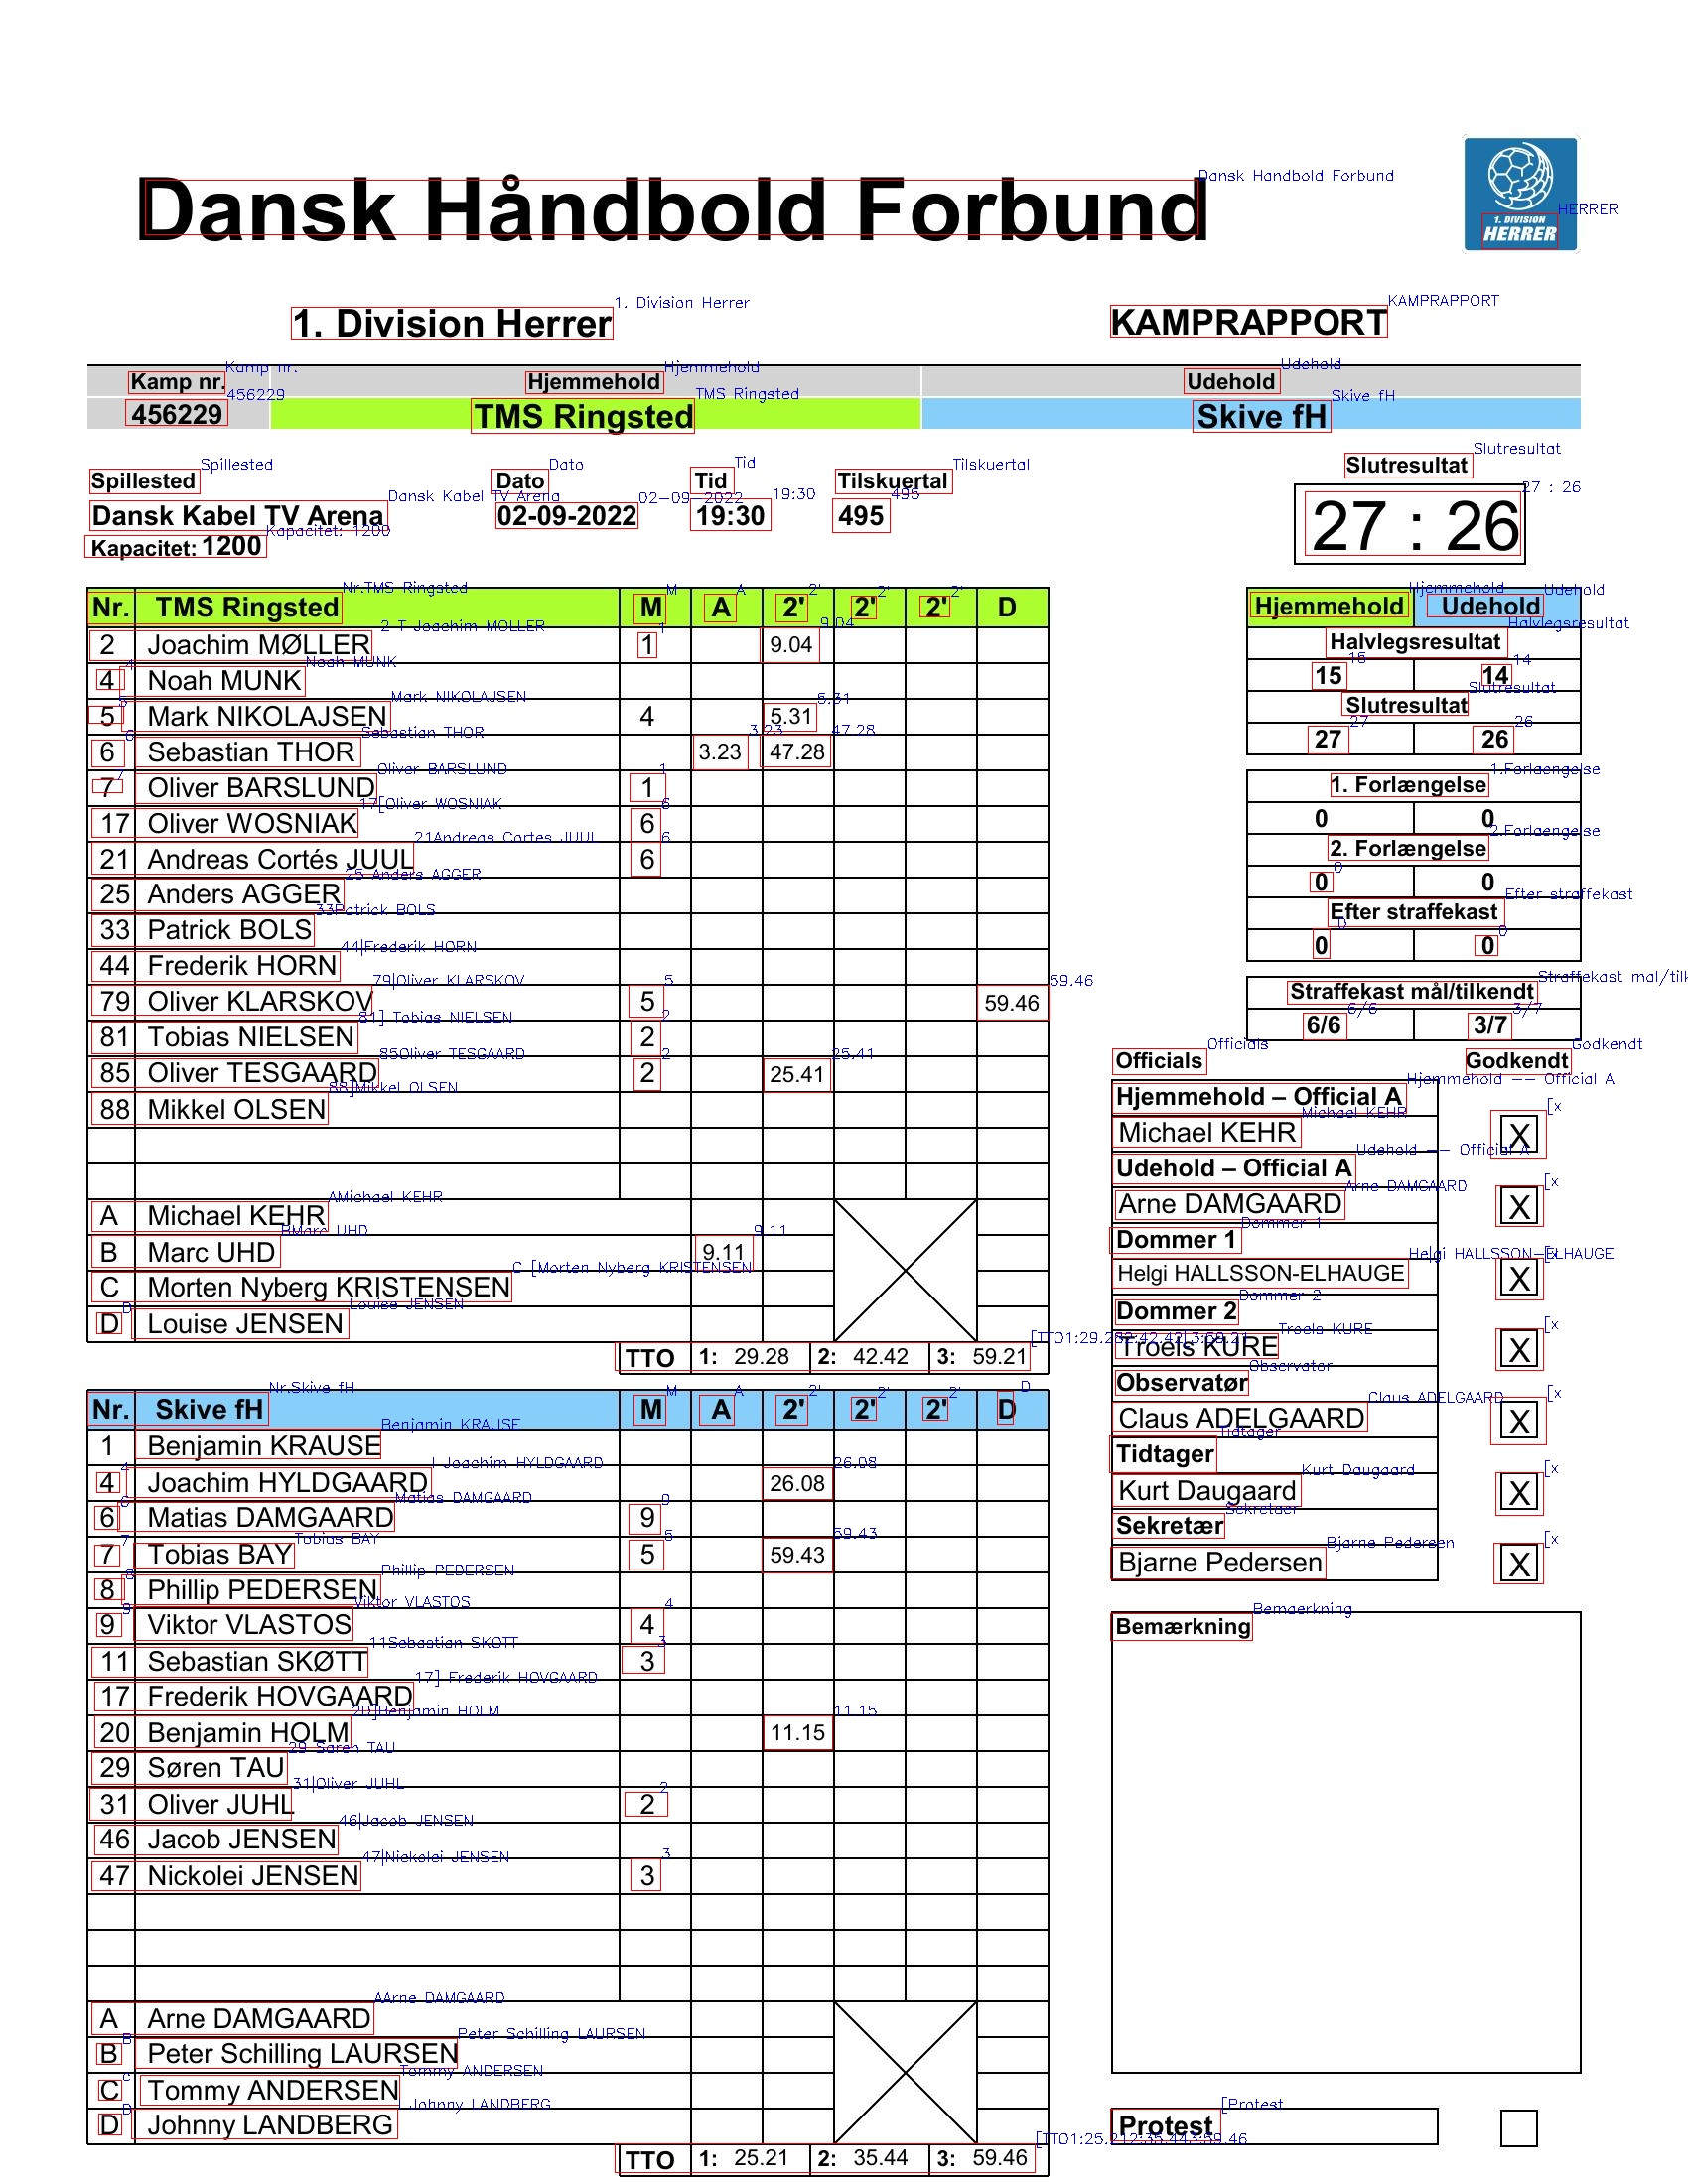

Dansk Handbold Forbund :  [[146.0, 181.0], [1206.0, 181.0], [1206.0, 236.0], [146.0, 236.0]]
HERRER :  [[1492.0, 215.0], [1568.0, 215.0], [1568.0, 250.0], [1492.0, 250.0]]
1. Division Herrer :  [[293.0, 309.0], [617.0, 309.0], [617.0, 341.0], [293.0, 341.0]]
KAMPRAPPORT :  [[1118.0, 307.0], [1397.0, 307.0], [1397.0, 339.0], [1118.0, 339.0]]
Kamp nr. :  [[129.0, 374.0], [226.0, 374.0], [226.0, 396.0], [129.0, 396.0]]
Hjemmehold :  [[529.0, 374.0], [668.0, 374.0], [668.0, 396.0], [529.0, 396.0]]
Udehold :  [[1192.0, 371.0], [1289.0, 371.0], [1289.0, 396.0], [1192.0, 396.0]]
456229 :  [[126.0, 402.0], [227.0, 396.0], [229.0, 428.0], [128.0, 434.0]]
TMS Ringsted :  [[474.0, 401.0], [700.0, 406.0], [699.0, 436.0], [473.0, 431.0]]
Skive fH :  [[1201.0, 403.0], [1340.0, 403.0], [1340.0, 435.0], [1201.0, 435.0]]
Slutresultat :  [[1354.0, 456.0], [1483.0, 456.0], [1483.0, 481.0], [1354.0, 481.0]]
Spillested :  [[90.0, 472.0], [201.0, 472.0], [201.0, 497.0], [90.0, 497.0]]
Dato :  [[494.0, 472.0

In [30]:
from IPython.display import Image
display(Image('p_with_boxes.jpg'))

for i in range(len(texts)):
  print(texts[i],": ", boxes[i])
